In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap #нужно
from sklearn import neighbors #нужно
from sklearn.preprocessing import StandardScaler #нужно
from sklearn.svm import SVC #нужно
from sklearn.metrics import accuracy_score #нужно
from sklearn.metrics import recall_score #нужно
from sklearn.model_selection import train_test_split #нужно

Загружаем файл с данными

In [5]:
df = pd.read_csv('heart.csv', sep = ',')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Для анализа построим гистограммы по нашим данным

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281E8667F48>,
      dtype=object)

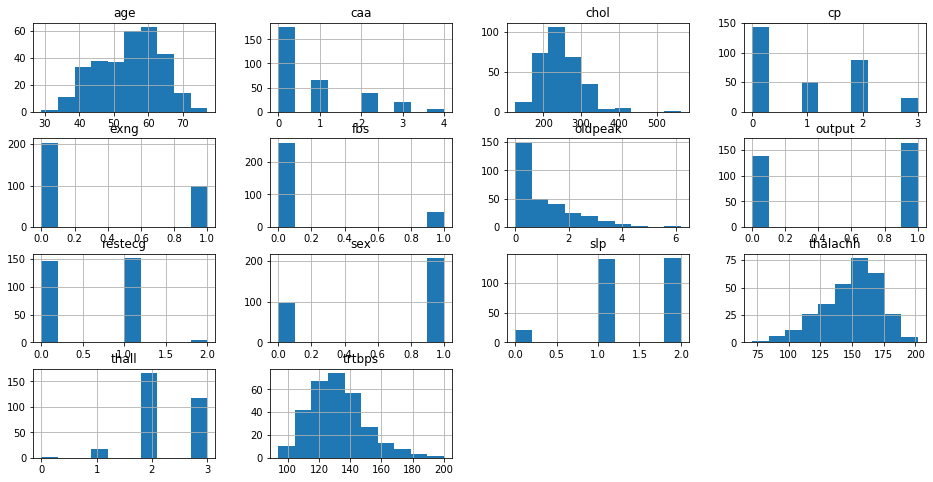

In [6]:
df.hist(figsize=(16,8))

Посмотримхарактеристики на предмет однородности данных

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


В целом данные однородны,посмотрим размер датафрейма

In [16]:
df.shape

(303, 14)

Посмотрим наличие дубликатов и их удалим

In [17]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [18]:
df.drop_duplicates(inplace=True)

Для более качественного выполнения алгоритма перемешаем все строки

In [19]:
df_2 = df.sample(frac=1)
df_2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


Посмотрим тепловую карту и определим признаки с наибольшей или наименьшей корелляцией

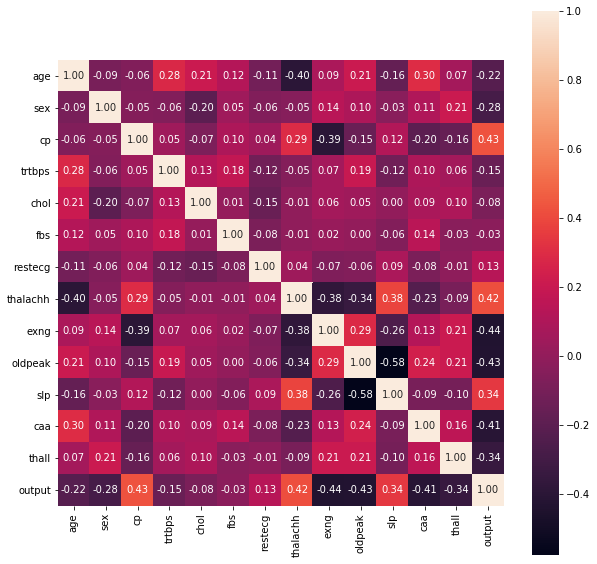

In [20]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_2.corr(),square = True, annot=True, fmt='.2f')
plt.show()

Посмотрим данные на пропуски

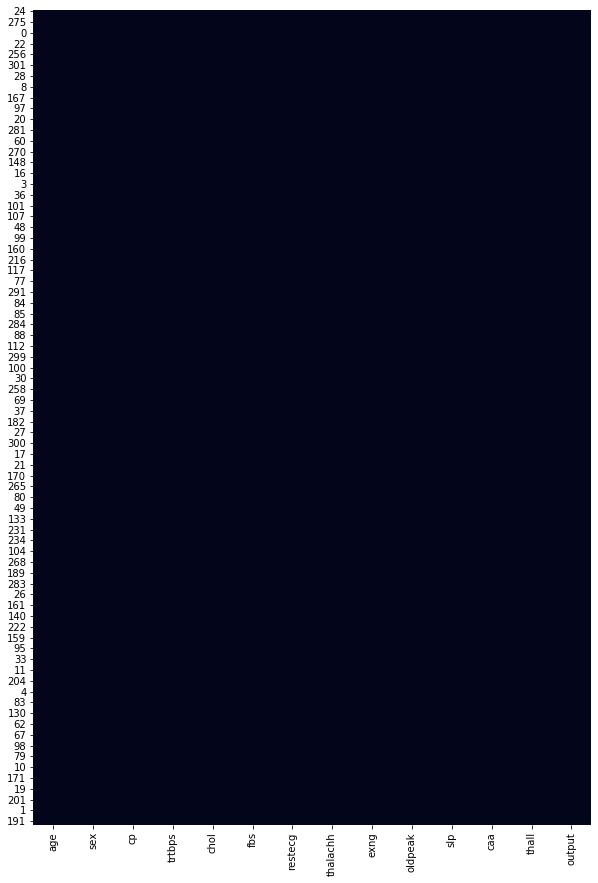

In [27]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df_2.isnull(), cbar=False)

Ещё раз убедимся, что признаки в нашей таблице являются числовыми 

In [28]:
df_2._get_numeric_data().columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Удалим колонку признаками болезни сердца, эту колонку заведём в y, а оставшийся датафрейм - в Х

In [29]:
X = np.array(df_2[df_2._get_numeric_data().columns].drop('output', axis=1))
y = np.array(df_2['output'])

In [30]:
X

array([[40.,  1.,  3., ...,  2.,  0.,  3.],
       [42.,  1.,  2., ...,  2.,  0.,  2.],
       [42.,  0.,  2., ...,  1.,  0.,  2.],
       ...,
       [61.,  1.,  2., ...,  1.,  0.,  2.],
       [58.,  1.,  0., ...,  1.,  3.,  3.],
       [60.,  1.,  0., ...,  1.,  2.,  3.]])

In [31]:
X.shape

(302, 13)

In [32]:
y

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [33]:
y.shape

(302,)

Разделяем датасет на тестовую и тренировочную выборку и посмотрим размеры

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [35]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 13) (61, 13) (241,) (61,)


Подготавливаем данные для моделирования

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Support Vector Machine

In [50]:
svc = SVC()
svc.fit(X_train, y_train)
  
predicted = svc.predict(X_test)
print (accuracy_score(y_test, predicted), recall_score(y_test, predicted))

0.7049180327868853 0.8529411764705882


Выводим две метрики:Accuracy и Recall. В целом, метрики выглядят недостаточно хорошо. Из тепловой карты видно, что есть некоторые показатели с большой корелляцией. Попробуем нормализовать и посмотрим что получится

In [46]:
X_train2 = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
X_test2 = (X_test - X_test.mean(axis=0))/X_test.std(axis=0)

In [51]:
model = SVC()
model.fit(X_train2, y_train)
  
predicted = model.predict(X_test2)
print (accuracy_score(y_test, predicted), recall_score(y_test, predicted))

0.7377049180327869 0.7941176470588235


Метрики немного улучшились

Nearest Neighbors Classification

In [ ]:
Применим метод классификации ближайших соседей, возьмем количество соседей = 35 с размером шага 0,02
с параметром присвоения веса пропорционального обратному расстоянию 'distance'

In [54]:
n_neighbors = 35
h=.02
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted), recall_score(y_test, predicted))

0.7377049180327869 0.9117647058823529


Видно, что  accuracy не изменилось в отличие от recall

Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted = gnb.predict(X_test)
print (accuracy_score(y_test, predicted), recall_score(y_test, predicted))

0.7213114754098361 0.8529411764705882


Метрики наоборот ухудшились.

Вывод: из применённых подходов наилучшим образом показал себя Nearest Neighbors Classification.Однако даже данный подход недостаточно хорошо проводит классификацию элементов выборки и соответственно хорош а предсказывании болезней сердца